## Plotting options 

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

### Random rectangular graph
- References
    - https://academic.oup.com/comnet/advance-article-abstract/doi/10.1093/comnet/cnx053/4581995?redirectedFrom=fulltext
    - https://arxiv.org/pdf/1708.03607.pdf

Definition

In [7]:
def plot_net(n,r,dim_base, name):
    '''
       Parameters
       ----------
       n         : int,  number of points(nodes).
       r         : float, conecction radius.
       dim_base  : float, lenght size a.
       name      : string, network name to save plot.

       Returns
       -------
       plot figure.
    '''
    lista_puntos = []
    alto = 1/dim_base
    largo = dim_base
    for i in range(n):
        x1 = random.uniform(0, largo)
        y1 = random.uniform(0, alto)
        lista_puntos.append([x1,y1])
    if dim_base == 1:
        plt.figure(figsize = (4, 4))
    else:
        plt.figure(figsize = (14, 3))
        
    (x,y) = zip(*np.array(lista_puntos))
    matriz_r = np.diag(np.sqrt(2)*np.random.randn(n))
    for punto in range(n - 1):
        d = np.sqrt((x[punto + 1:] - x[punto])**2 + (y[punto + 1:] - y[punto])**2)
        dbool = np.where(d <= r)[0] + punto + 1
        if len(dbool) > 0:
            rnd = np.random.randn(1, len(dbool))[0]
            punto_actual = np.full(len(dbool), punto, dtype=int)
            matriz_r[punto_actual, dbool] = rnd
            matriz_r[dbool, punto_actual] = rnd
    color = np.diag(matriz_r)
    plt.scatter(x, y, lw = 0, s = abs(color)*20, c = color, cmap = 'RdBu')
    for i in range(n):
        x1 = lista_puntos[i][0]
        y1 = lista_puntos[i][1]
        for k in range(i+1,n,1):
            x2 = lista_puntos[k][0]
            y2 = lista_puntos[k][1]
            if np.sqrt((x1 - x2)**2 + (y1 - y2)**2) <= r:
                if matriz_r[i, k] >= 0:
                    plt.plot([x1, x2], [y1, y2], '-', lw = abs(matriz_r[i, k])/5, c = 'b')
                else:
                    plt.plot([x1, x2], [y1, y2], '-', lw = abs(matriz_r[i, k])/5, c = 'r')
    plt.grid()
    plt.ylim(ymax = alto)
    plt.ylim(ymin = 0)
    plt.xlim(xmax = largo)
    plt.xlim(xmin = 0)
    plt.xticks([0, largo])
    plt.yticks([0, alto])
    plt.tick_params(axis='both', which='major', labelsize = 18)
    plt.savefig(name + '.png', format='png', dpi = 200, bbox_inches='tight')
    plt.show()
    return matriz_r, x, y

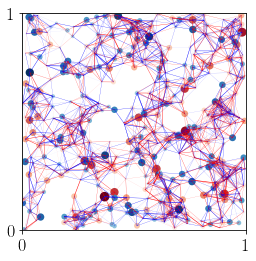

In [8]:
adjacency_matrix, x, y = plot_net(500, .1, 1, 'FigNet500dot_1')